# Project for statstics where the assignment is to explore a dataset and use some of the tools we been working on. This is very basic

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as scs 
import pandas as pd
import math


iris_file = '/Users/joeloscarsson/Documents/www/Statistics/Data/iris.csv'

df = pd.read_csv(iris_file)
df = df.dropna() #Drop all non NaN

df.head(1)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa


------------------
## Några frågeställningar jag vill spana på under detta datasetet är.
Skiljer sig kronbladsbredden mellan de olika blomtyperna avsevärt?
Det jag undersöker är då om petal width (Kronbladsbredd) för iris-setosa skiljer sig från bredden på kronblad för samtliga olika klasser blommor. 

### $\mu_0$ = 3.418 cm). 


Med en signifikansnivå på 
### $\alpha = 0.05$.
Och med avsevärt menar jag med mindre än 10%. 

Så vi formulerar vår alternativhypotes som:
   ### $H_A: p < 10%$
Och vår nollhypotes som:

   ### $H_0: p > 10%$


   H0 = Högre än 10%
   H1 = Mindre än 10%

sepal = foderbladsbredd

ValueError: Could not interpret value `Foderbladsbredd` for parameter `x`

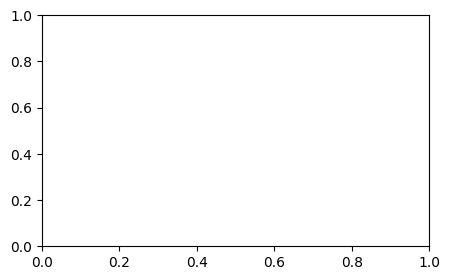

In [8]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.histplot(df, x="Foderbladsbredd", bins=8)


# Undersöker medelvärdet och medianen för Kronbladsbredden
Kronbladsmedelvärde = (np.mean(df["Kronbladsbredd"]),)
Kronbladsmedian = (df["Kronbladsbredd"])
plt.plot(
    [Kronbladsmedelvärde, Kronbladsmedelvärde],
    [0, 80],
    color="green",
    linestyle="--",
    linewidth=1,
    label="Medelvärde",
);

leg = plt.legend(loc='upper left') # Rita legend för medelvärde och median i övre högra hörnet
plt.show()

In [2]:
# Ändrar namn på kolumnerna så de är mer lättförstådda
df.columns = df_list_names = [
    "Foderbladslängd",
    "Foderbladsbredd",
    "Kronbladsbredd",
    "Kronbladslängd",
    "Blomtyp",
]

df.head()

# Undersöker standardavvikelsen för samtliga bredder/längder av samtliga blad
# Undersöker medianen för samtliga bredder/längder av samtliga blad

df.std(numeric_only=True),


(Foderbladslängd    0.828066
 Foderbladsbredd    0.433594
 Kronbladsbredd     1.764420
 Kronbladslängd     0.763161
 dtype: float64,)

In [3]:
df["Blomtyp"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:
df.describe()

,Foderbladslängd,Foderbladsbredd,Kronbladsbredd,Kronbladslängd
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# Här räknar jag ut medelvärdet för foderbladsbredden för iris-setosa 
print(df[df["Blomtyp"] == "Iris-setosa"]["Foderbladsbredd"].mean())


3.418


## Låt oss göra ett histogram över Kronbladsbredden för alla blomtyper i vårt dataset. 


# Linjär regression
-  Om man kan avgöra bara på Kronbladsbredden om man kan säga något om längden för bladen. 
- Man kan ta hänsyn till att hypotestestet endast testar bredd. När man kanske egentligen kan säga ngt OM både längd och bredd. Men i detta fall så gäller bredd.